# Urban Rainwater Economics
This is a quick simulation to see how a rainwater collection system would work on my house in Oakland. You can edit the values to see what how the sytem would work for your house. 

First lets define the essential parts of our rainwater system.

* **rainfall** - rain that falls on an area (inches)
* **stored water** - water stored for later use (gallons)
* **collection area** - space availible to collect rainwater (square feet)
* **irrigation** - water used on crops (inches or gallons)
* **irrigated area** - area that needs irrigation

We'll simulate how the system changes over time to see what size of water tank would be needed to store all the rainwater. Second we'll look ot see if it makes economic sense to store the rain water. 

## Rainwater Availible
My house is a two story house with a roof area of about 800 feet. I've used the average inches of rainfall per month from weather.com.

In [12]:
#months used to plot
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

collection_area = 800 #sqft of where you collect rain

#inches of rain per area
rainfall =    [2,   1,     .5,    .5,    .5,    1,     
               1,     1,     1,     3,     8,     8 ]


In [13]:
# return the gallons equivalent to inches of rain falling on an area
def in_to_gal(inches, sqft): return inches * sqft * 144 * 0.004329

rain_collected  = [int(in_to_gal(i, collection_area)) for i in rainfall]
rain_collected

[997, 498, 249, 249, 249, 498, 498, 498, 498, 1496, 3989, 3989]

## Water Use

The amount of water needed depends on the area to irrigate, and the rainfall and temperature of the location. For this example the i'm assuming that my garden needs 9 inches of irrigation per month during the hottest months. 

In Oakland it is 20 degrees warmer in the summer which causes more water to be evaporated from the soil and plants. To account for this we apply a seasonal scale to lower the irrigation demand in the winder.

In [18]:
irrigation_area = 400 #sqft

max_irrigation_demand = 9.0 #water needed during hot months inches per month
season_scale = [.3, .4, .4, .5, .6, .8, 1., 1., 1., .8, .6, .5]

irrigation_demand = [i * max_irrigation_demand for i in season_scale]

In [19]:
#irrigation is not needed when it rains
irrigation_used =  [max(irrigation_demand[i] - rain_inches[i], 0) for i in  range(12) ]

#convert to gallons
irrigation_used = [in_to_gal(irrigation_used[i], irrigation_area) for i in range(12)]

### Visualize
We can see plot these supply and demand curves to see that they do not happen at the same times.

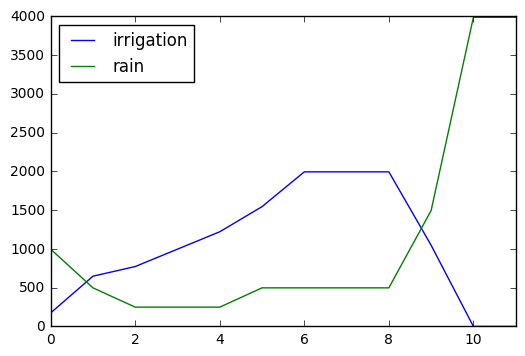

In [5]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame({'rain':rain, 'irrigation': irrigation_used})
df.plot()

# Simulate
Here we create a function to simulate a system that saves the rainwater and is used later. At first we'll assume that our tank can hold 1000 gallons.

In [20]:
from copy import deepcopy

stored_history = []
stored = 0

def run_year(stored, tank_size=1000):
    for i, m in enumerate(months):

        #keep the rain 
        stored = max(stored - irrigation_used[i] + rain[i], 0)
        
        #only keep the water that fits
        stored = min(stored, tank_size)

        #record stored value for later
        stored_history.append(deepcopy(stored))

    return stored

Now we run simulation for a year and visualize the results

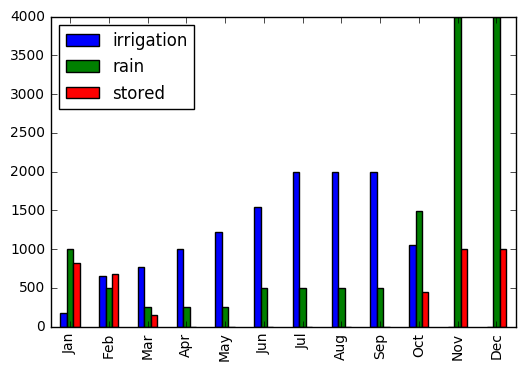

In [7]:
stored = run_year(stored)

data = {'rain': rain, 'irrigation':irrigation_used, 
        'stored':stored_history}

df = pd.DataFrame(data, index=months)
df.plot(kind='bar')

This graph shows that our 1000 gallon tank is not close to big enough. So, we'll rerun the simulation to find the right size tank.  


7940


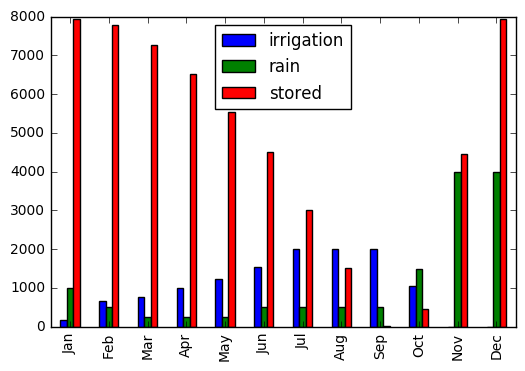

In [21]:
tank_size = 0
stored=0
min_stored = 0 #used to check if tank gets empty during the year

while min_stored <= 0: 
    tank_size += 10
    stored = run_year(stored, tank_size=tank_size)
    min_stored = min(stored_history[-12:])

print(tank_size)

data = {'rain': rain, 'irrigation':irrigation_used, 
        'stored':stored_history[-12:]}

df = pd.DataFrame(data, index=months)
df.plot(kind='bar')

### How big is this tank?

Where would it be possible to store this tank? 

In [22]:
def gal_to_ft3 (gal): return gal * 0.133681

gal_to_ft3(tank_size)

1061.42714

#### For reference:
* Cargo container (8ft x 8ft x 20ft):    **1290** ft^3
* Homemade water tank (3ft x 3ft x 3ft)     **9** ft^3

Turns out this is a massive tank (similar to a large truck). Lets see if it makes economic sense.

## Irrigation and tank costs
I looked up my [EBMUD water rates](http://www.ebmud.com/water-and-drought/water-rates/) and find they charge a little over $5 for every 100 cubic feet of water I use. 

In [10]:
irrigation_costs = 5.45 #$ per 100 cubic feet

def ft3_to_gal (cubic_feet): return cubic_feet / 0.133681

irrigation_costs = irrigation_costs / ft3_to_gal(100)

print(irrigation_costs)

sum(irrigation_used)*irrigation_costs

0.007285614500000001


90.28854322409379

## Results
We're done here. Given that we'd need a cargo containers to save $90 per year, we can stop this analysis with the the conclusion that it will not save money to collect rain water. 

So when you have this idea in a downboa

![Have a nice day](http://66.media.tumblr.com/dbeb33630423165649599d7589358ac4/tumblr_npyb5cwiym1rs4x5ro1_250.gif)